In [6]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

import scipy
import librosa
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
    if xlim:
      axes[c].set_xlim(xlim)
  figure.suptitle(title)
  plt.show(block=False)

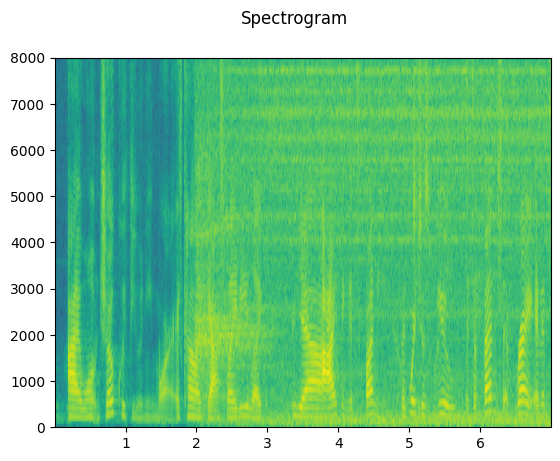

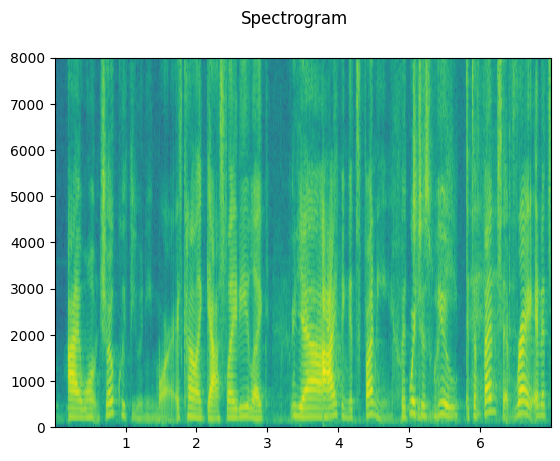

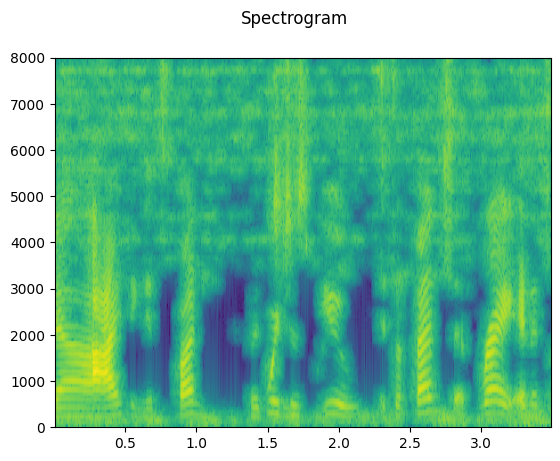

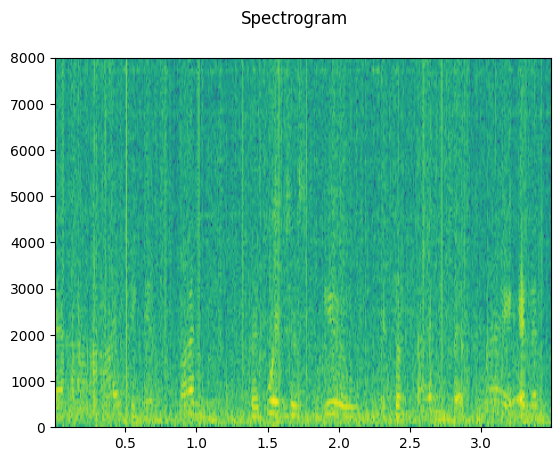

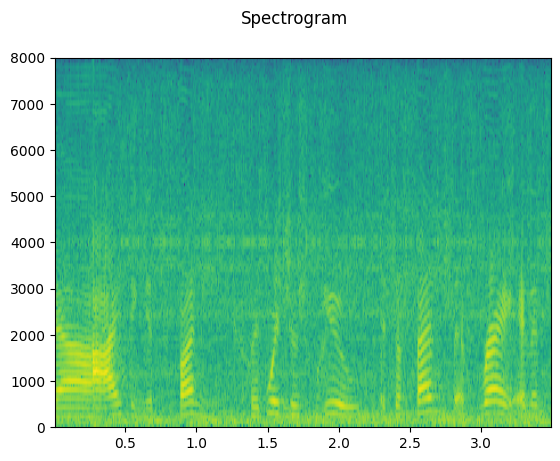

In [13]:
file_name = "toxic_reddit_stories_165.wav"

n_fft = 1024
win_length = None
hop_length = 512
n_mels = 128
sample_rate = 16000

mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm='slaney',
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)

for folder in ["noisy", "clear", "spectral", "diffusion", "convae"]:
  waveform, sample_rate = torchaudio.load(f"../results/test_{folder}/{file_name}")
  if waveform.shape[0] > 1:
    waveform = torch.mean(waveform, dim=0, keepdim=True)
  melspec = mel_spectrogram(waveform)
  plot_specgram(waveform, sample_rate, title=f"Spectrogram {folder.capitalize()}")
